In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather=pd.read_csv(r'C:\Users\Vinh Hoa Tu\Downloads/london_weather123.csv')
print(weather.head())
print(weather.info())
sunshine=weather[['date', 'sunshine']]
print(sunshine)

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341

In [144]:
sunshine

,date,sunshine
0,19790101,7.0
1,19790102,1.7
2,19790103,0.0
3,19790104,0.0
4,19790105,2.0
...,...,...
15336,20201227,0.9
15337,20201228,3.7
15338,20201229,0.0
15339,20201230,0.4


In [207]:
sd = sunshine.loc[len(sunshine)-1096:len(sunshine),['date', 'sunshine']] # only keep 3 last years
sd= sd.reset_index(drop=True) #reset the indice of dataframe
sd['date'] = pd.to_datetime(sd['date'], format='%Y%m%d') #change date into date_type
sd

,date,sunshine
0,2018-01-01,0.2
1,2018-01-02,0.0
2,2018-01-03,1.3
3,2018-01-04,0.1
4,2018-01-05,2.3
...,...,...
1091,2020-12-27,0.9
1092,2020-12-28,3.7
1093,2020-12-29,0.0
1094,2020-12-30,0.4


In [208]:
sd.set_index('date', inplace=True)
sd

,sunshine
date,
2018-01-01,0.2
2018-01-02,0.0
2018-01-03,1.3
2018-01-04,0.1
2018-01-05,2.3
...,...
2020-12-27,0.9
2020-12-28,3.7
2020-12-29,0.0


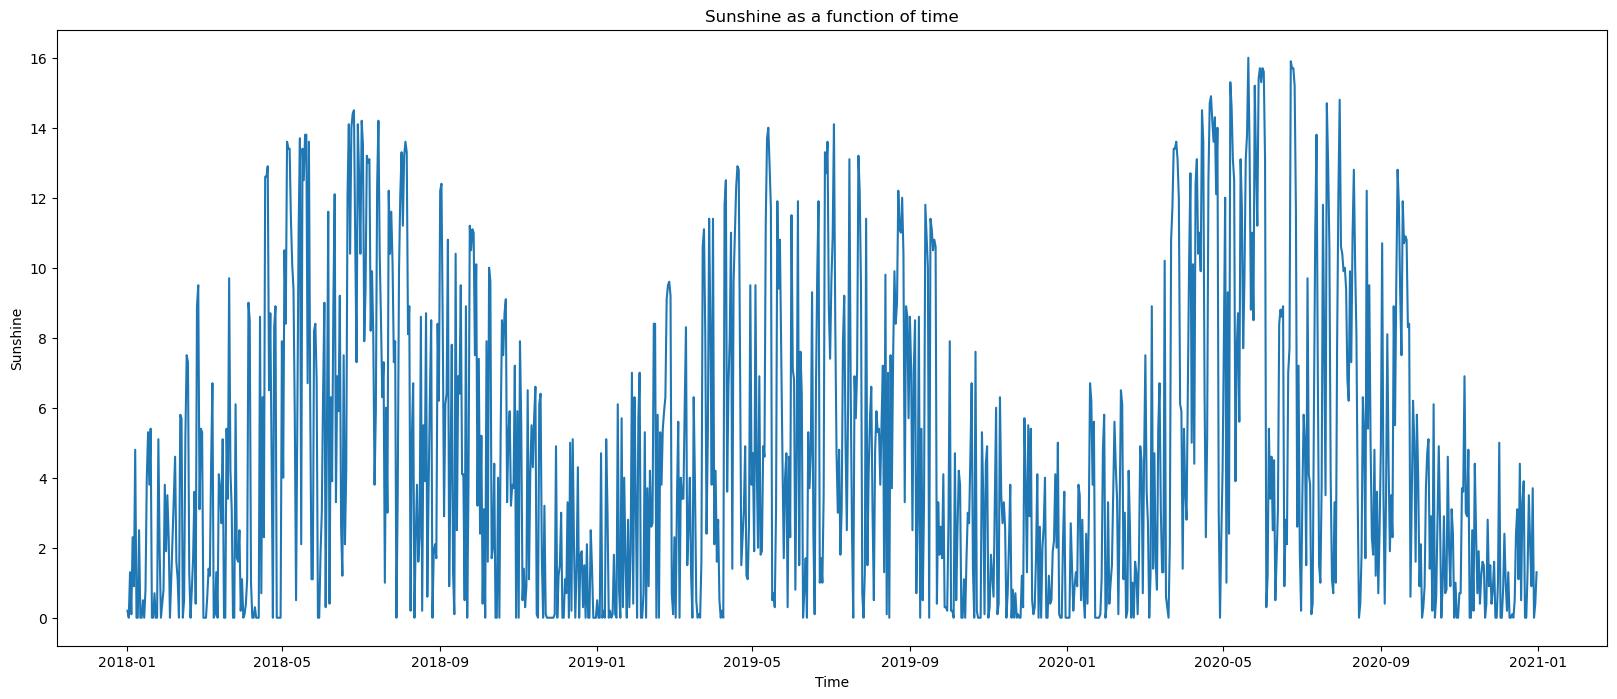

In [209]:
#show sd
plt.figure(figsize=(20,8))
plt.plot(sd['sunshine'])
plt.title('Sunshine as a function of time')
plt.xlabel('Time')
plt.ylabel('Sunshine')
plt.show()

In [210]:
mean=sd['sunshine'].mean()
variance=sd['sunshine'].var()
print(f'Moyenne : {mean}, Variance :{variance}')

Moyenne : 4.641879562043796, Variance :18.849961395527103


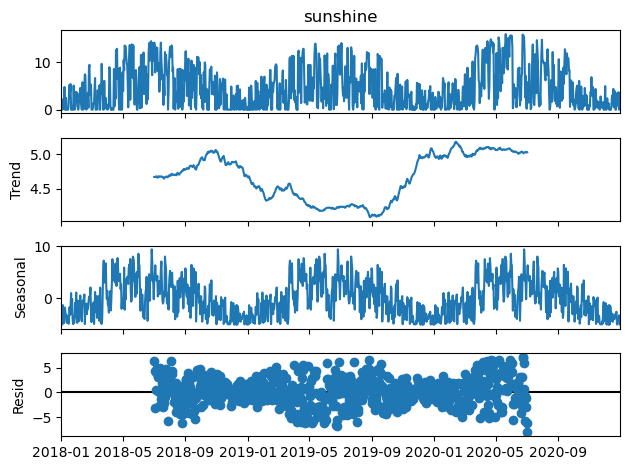

In [211]:
#decompose the serie into trend, seasonal, residual and stationary serie
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(sd['sunshine'], model='additive',period=365)
result.plot()
plt.show()

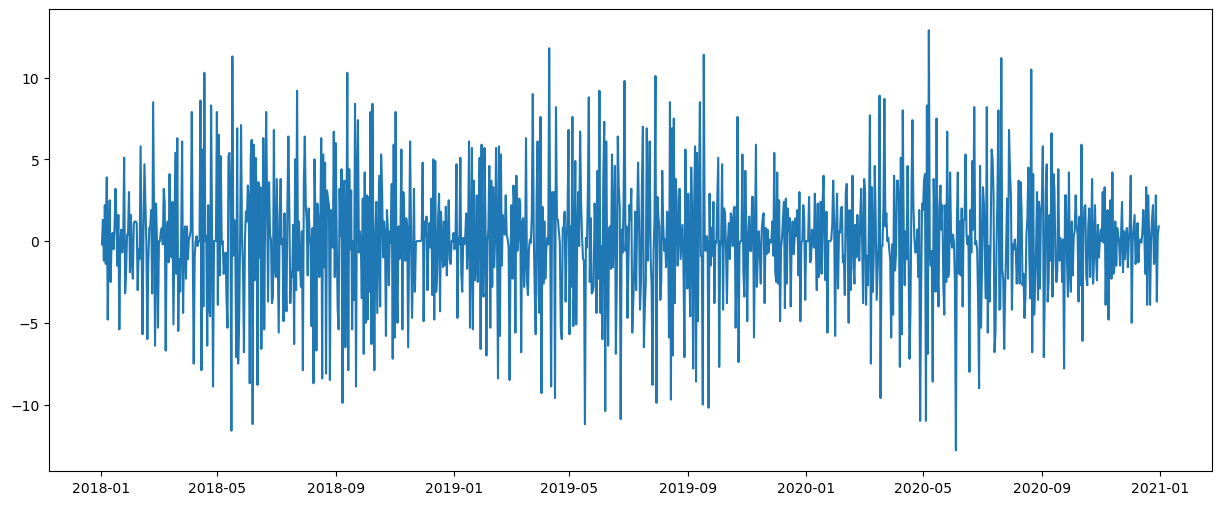

In [212]:
plt.figure(figsize=(15,6))
plt.plot(sd['sunshine'].diff()) # remove trend and season of sunshine by differencing 
stationnarized=sd['sunshine'].diff()

In [213]:
#Augmented Dickey-Fuller Test to test the stationarity of (Xt)
from statsmodels.tsa.stattools import adfuller
adfuller(sd['sunshine'])


result = adfuller(sd['sunshine'])

# Extracting and printing the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print("The null hypothesis (non-stationarity) can be rejected. The time series appears to be stationary.")
else:
    print("The null hypothesis cannot be rejected. The time series")

ADF Statistic: -3.7343128788697086
p-value: 0.00365559812368814
Critical Values:
   1%: -3.436441978605957
   5%: -2.864229841568573
   10%: -2.5682021659802934
The null hypothesis (non-stationarity) can be rejected. The time series appears to be stationary.


In [214]:
stationnarized=stationnarized.fillna(0)
stationnarized

date
2018-01-01    0.0
2018-01-02   -0.2
2018-01-03    1.3
2018-01-04   -1.2
2018-01-05    2.2
             ... 
2020-12-27   -1.2
2020-12-28    2.8
2020-12-29   -3.7
2020-12-30    0.4
2020-12-31    0.9
Name: sunshine, Length: 1096, dtype: float64

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

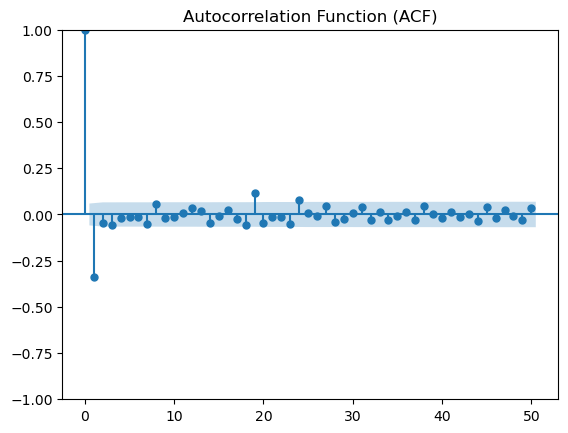

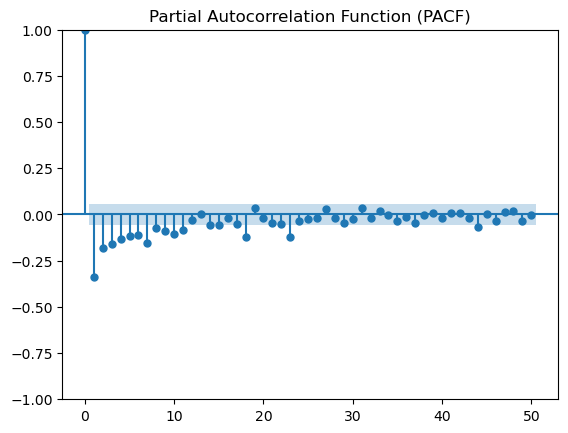

In [164]:
#ACF and PACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PLot ACF
plot_acf(stationnarized, lags=50)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(stationnarized, lags=(50))
plt.title('Partial Autocorrelation Function (PACF)')



MODEL AR


In [216]:
train_data = stationnarized[:len(stationnarized)-10]
test_data = stationnarized[len(stationnarized)-10:]
train_data = train_data.asfreq('D')
test_data = test_data.asfreq('D')

In [217]:
# train AR(23) model, lag=23 in summary AutoReg(23)

from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=23).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               sunshine   No. Observations:                 1086
Model:                    AutoReg(23)   Log Likelihood               -2788.037
Method:               Conditional MLE   S.D. of innovations              3.333
Date:                Sun, 23 Jun 2024   AIC                           5626.074
Time:                        13:18:02   BIC                           5750.296
Sample:                    01-24-2018   HQIC                          5673.147
                         - 12-21-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0022      0.102      0.021      0.983      -0.198       0.203
sunshine.L1     -0.5458      0.030    -17.926      0.000      -0.606      -0.486
sunshine.L2     -0.4271      0.035    -12.35

In [228]:
# prediction
predict= ar_model.predict(start= len(train_data), end=len(stationnarized)-1,dynamic=False)

Text(0.5, 1.0, 'Serie with the last 10% of value highlighted in red')

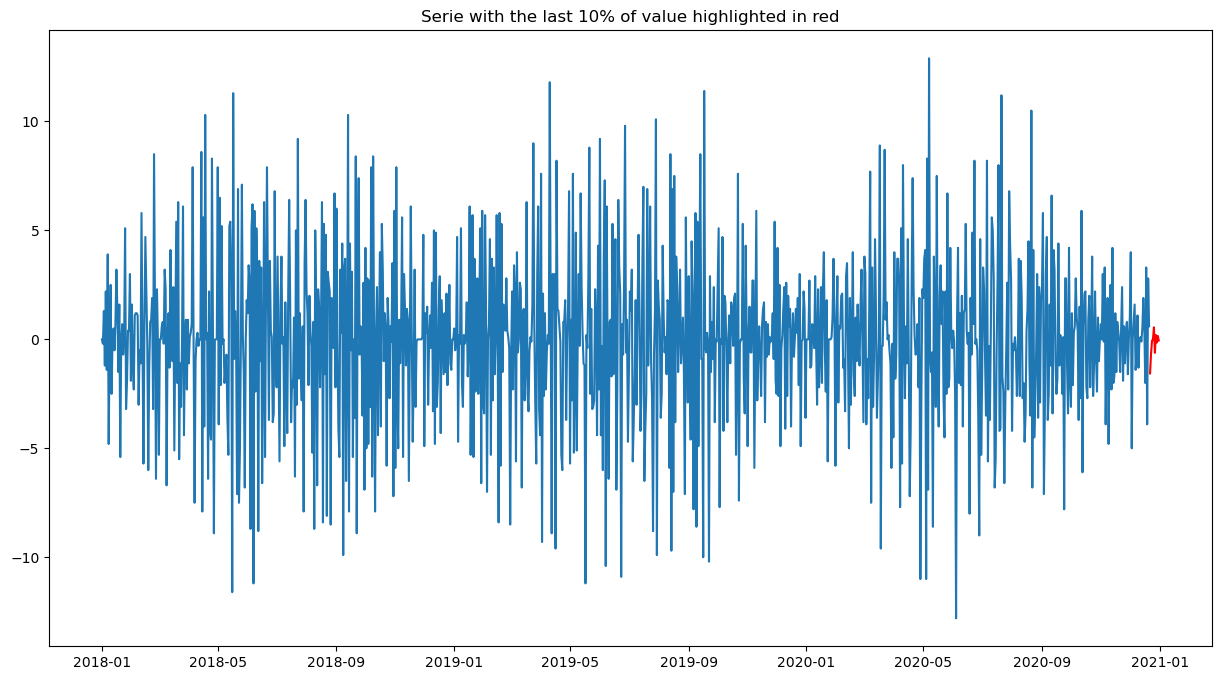

In [229]:
# ploting the serie with the last 10% of value highlighted in red
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(stationnarized[:len(stationnarized)-10])
plt.title('Serie with the last 10% of value highlighted in red')


Text(0.5, 1.0, 'Prediction of the last 10 values using AR(27)')

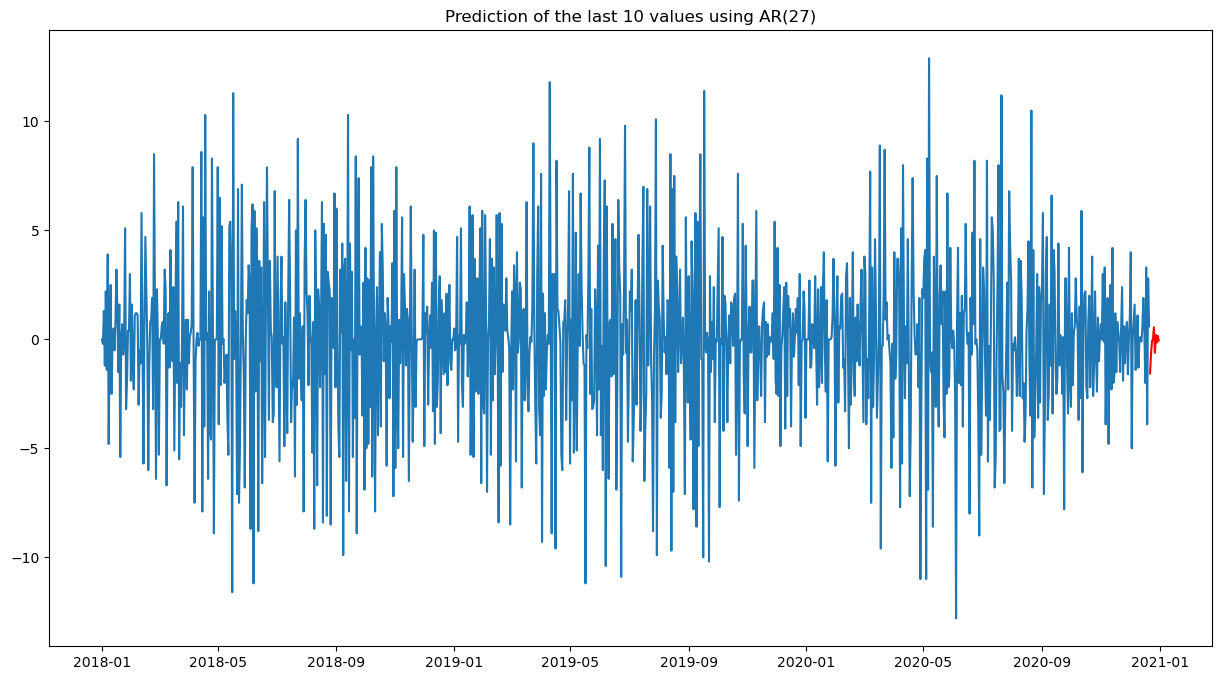

In [231]:
#prediction with AR model
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(stationnarized[:len(stationnarized)-10])
plt.title('Prediction of the last 10 values using AR(27)')


Text(0.5, 1.0, 'Prediction of the last 10 values using AR(23)')

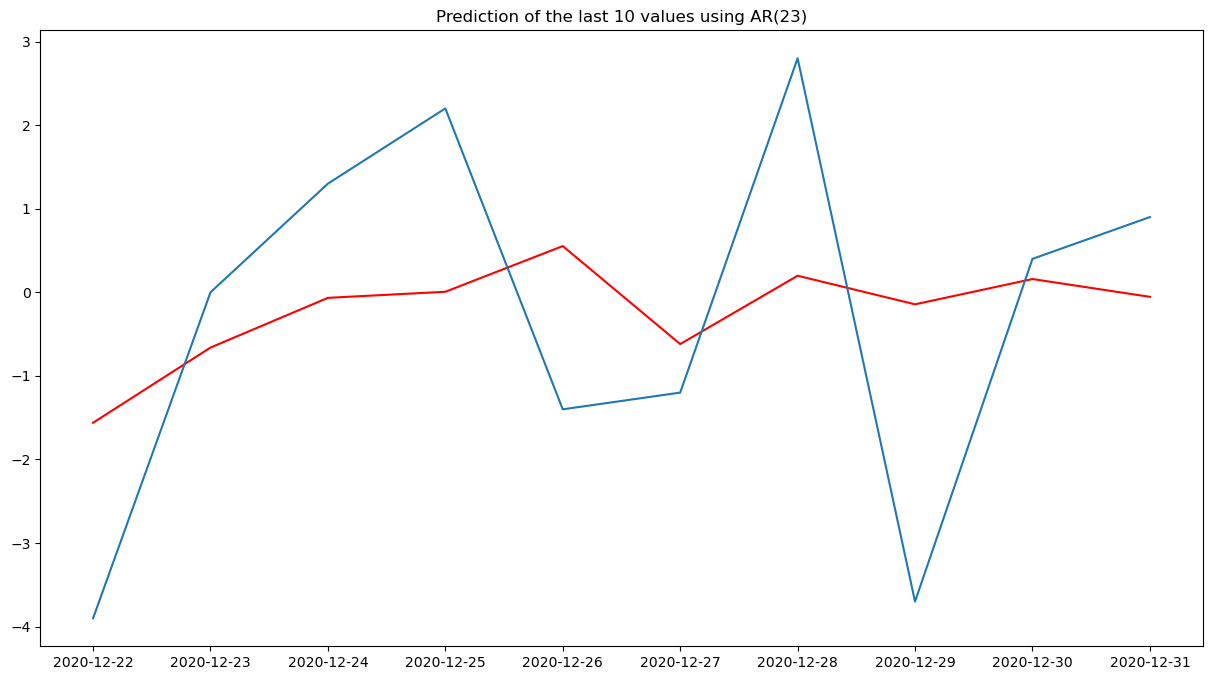

In [232]:
# ploting test_data and prediction using AR(23) modele
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(test_data)
plt.title('Prediction of the last 10 values using AR(23)')

Text(0.5, 1.0, 'ACF of standardized residuals')

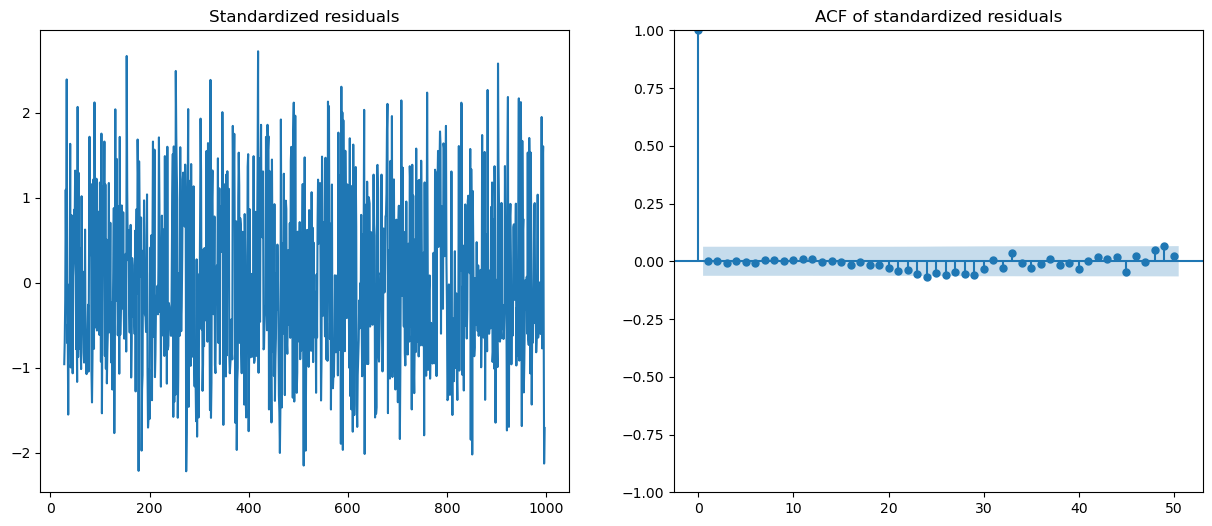

In [18]:
# residuals of model AR after training
residuals = ar_model.resid

# standadized residuals
std_residuals = residuals / np.std(residuals)


#plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Standardized residuals
axs[0].plot(std_residuals)
axs[0].set_title('Standardized residuals')

# Plot 2: ACF of standardized residuals
plot_acf(std_residuals, lags=50, ax=axs[1])  # Pass the ax object to plot_acf
axs[1].set_title('ACF of standardized residuals')

In [245]:
#Using Ljung-box to determine the confidence of the non-hypothesis
import statsmodels.api as sm
df= sm.stats.acorr_ljungbox(residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])
df1

,lb_pvalue
1,6.283324e-05
2,1.271891e-04
3,1.612843e-07
4,2.661117e-10
5,1.537130e-12
6,2.717267e-14
7,1.727376e-15
8,6.281342e-15
9,1.838122e-14
10,5.685913e-14


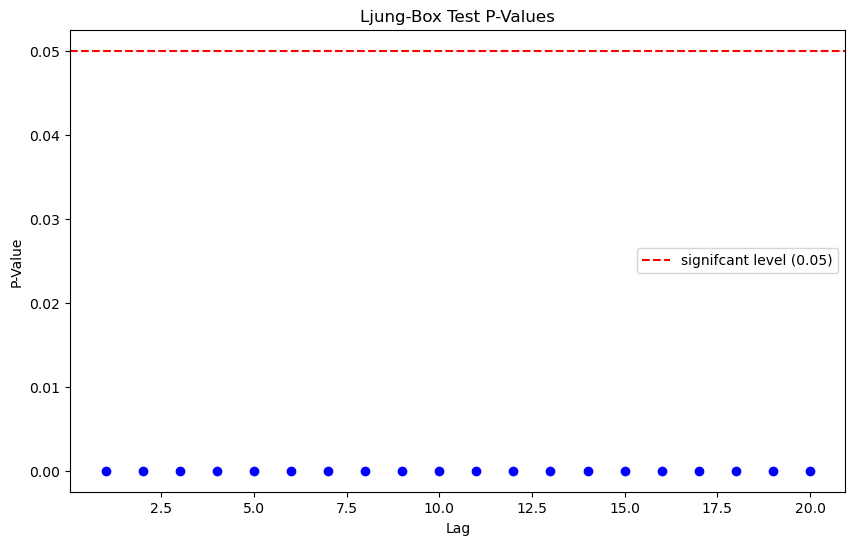

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), df1, marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

So we have to reject the null hypothesis that there is no autocorrelation between the residuals.

MODEL MA


In [240]:
MA2_model = sm.tsa.ARIMA(train_data, order=(0, 0, 1))
MA2_result = MA2_model.fit()
print(MA2_result.summary())

                               SARIMAX Results                                
Dep. Variable:               sunshine   No. Observations:                 1086
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2910.853
Date:                Sun, 23 Jun 2024   AIC                           5827.706
Time:                        13:25:32   BIC                           5842.677
Sample:                    01-01-2018   HQIC                          5833.373
                         - 12-21-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.043      0.056      0.955      -0.082       0.087
ma.L1         -0.5996      0.023    -25.940      0.000      -0.645      -0.554
sigma2        12.4585      0.493     25.281      0.0

In [241]:
theta1_estimated = MA2_result.params[1]
print(f'Theta1 Estimated: {theta1_estimated}')

Theta1 Estimated: -0.5995541506035053


In [242]:
# calculate residuals of MA(1)
residuals = MA2_result.resid
print(residuals)

date
2018-01-01   -0.002411
2018-01-02   -0.203474
2018-01-03    1.186184
2018-01-04   -0.512748
2018-01-05    1.893477
                ...   
2020-12-17   -0.829386
2020-12-18    2.800327
2020-12-19   -2.223463
2020-12-20    1.464503
2020-12-21    1.475638
Freq: D, Length: 1086, dtype: float64


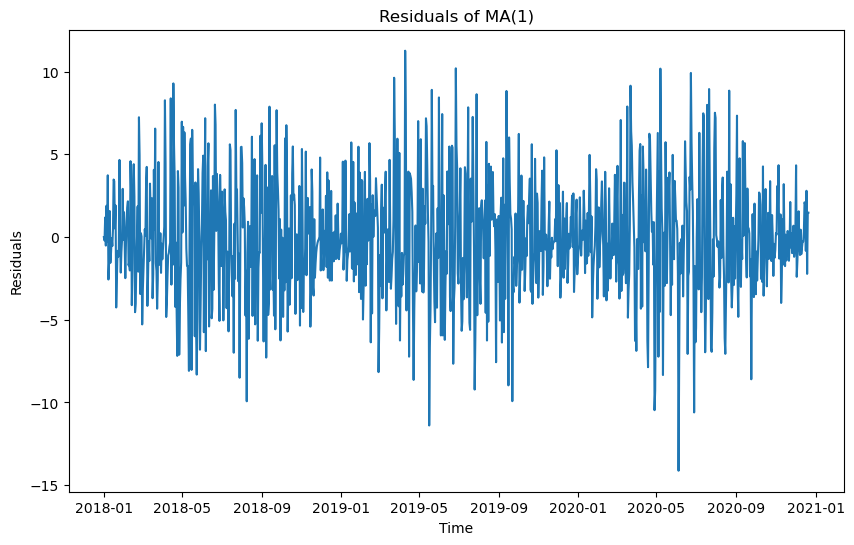

In [243]:
#plot residuals of MA(1)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of MA(1)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

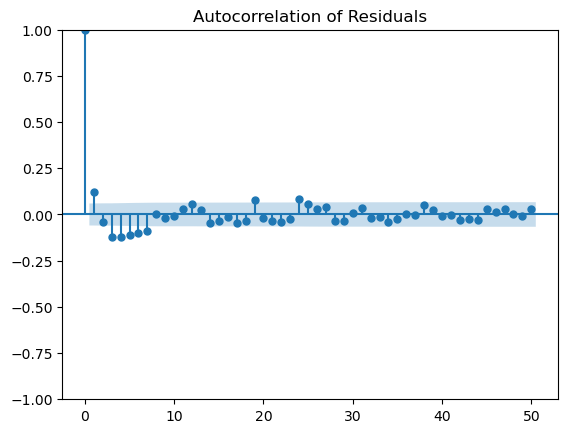

In [244]:
#Autocorrelation of Residuals

plot_acf(residuals, lags=50)
plt.title('Autocorrelation of Residuals')
plt.show()

In [26]:
df= sm.stats.acorr_ljungbox(residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])
print(df1)

       lb_pvalue
1   7.844556e-01
2   2.232239e-01
3   2.664030e-01
4   4.121621e-01
5   5.232815e-01
6   3.625465e-01
7   2.113106e-01
8   3.617141e-02
9   8.402715e-06
10  1.635568e-06
11  3.027469e-09
12  4.043886e-12
13  1.590007e-14
14  2.111867e-16
15  4.112231e-17
16  2.209168e-17
17  3.893065e-17
18  1.336235e-18
19  3.468509e-18
20  3.873959e-18


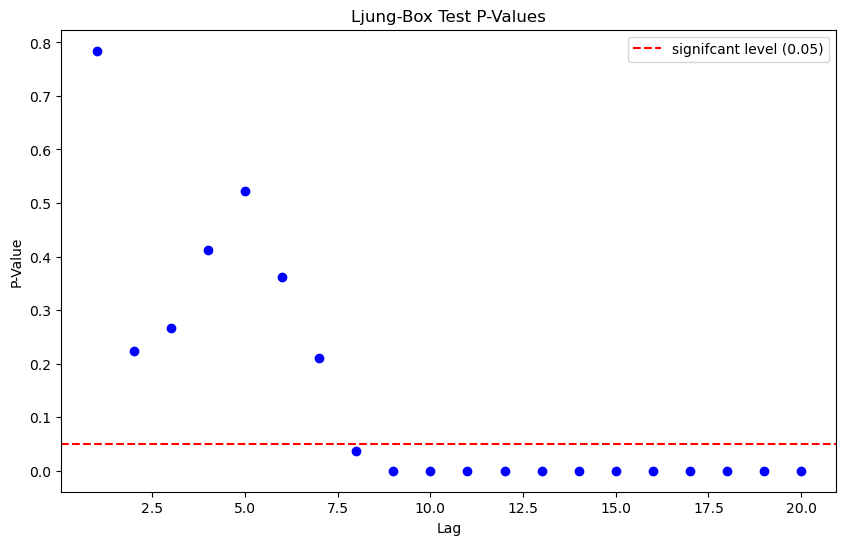

In [27]:
#Ljung-Box
plt.figure(figsize=(10, 6))
plt.plot(range(1,21),df1,marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

So there is no autocorrelation up to 7 lags in residuals 

In [246]:
MA2_model=sm.tsa.ARIMA(train_data,order=(0,0,1))
MA2_result=MA2_model.fit()
predict= MA2_result.predict(start= len(train_data)+1, end=len(stationnarized),dynamic=False)
print(predict)

2020-12-23    0.002411
2020-12-24    0.002411
2020-12-25    0.002411
2020-12-26    0.002411
2020-12-27    0.002411
2020-12-28    0.002411
2020-12-29    0.002411
2020-12-30    0.002411
2020-12-31    0.002411
2021-01-01    0.002411
Freq: D, Name: predicted_mean, dtype: float64


MODEL  ARMA


In [247]:
# calculate the table of AIC value of different orders with p<=4 and q<=2
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm


# Extract the relevant column from your dataset (replace 'column_name' with the actual column name)
data = stationnarized

dfs = []

# Create a table to store the results
results_table = pd.DataFrame(columns=['p', 'q', 'AIC'])

# Choose values for p and q
p_values = range(0, 5)  # Adjust the range based on your needs
q_values = range(0, 3)  # Adjust the range based on your needs

# Iteration over different combinations of p and q
for p in tqdm(p_values, desc='Progress'):
    for q in q_values:
        order = (p, 0, q)  # Use (p, d, q) with d=0 for stationary time series
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=order)
            results = model.fit()

            # Save the results in the table
            df_result = pd.DataFrame({'p': [p], 'q': [q], 'AIC': [results.aic]})
            
            dfs.append(df_result)
        except Exception as e:
            print(f"ARIMA({p}, 0, {q}) model did not converge. Error: {e}")
            continue

results_table = pd.concat(dfs, ignore_index=True)
# Display the results table
print(results_table)

Progress:   0%|          | 0/5 [00:00<?, ?it/s]C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No freq

    p  q          AIC
0   0  0  6084.520035
1   0  1  5873.756743
2   0  2  5807.737056
3   1  0  5954.294170
4   1  1  5772.768127
5   1  2  5770.377586
6   2  0  5919.549256
7   2  1  5769.746697
8   2  2  5771.406815
9   3  0  5893.788371
10  3  1  5771.271604
11  3  2  5773.723356
12  4  0  5876.874476
13  4  1  5772.989418
14  4  2  5774.618686


In [248]:
# calculate the table of BIC value of different orders with p<=4 and q<=2
from tqdm import tqdm

# Extract the relevant column from your dataset (replace 'column_name' with the actual column name)
data = stationnarized

dfs = []

# Create a table to store the results
results_table = pd.DataFrame(columns=['p', 'q', 'BIC'])

# Choose values for p and q
p_values = range(0, 5)  # Adjust the range based on your needs
q_values = range(0, 3)  # Adjust the range based on your needs

# Iteration over different combinations of p and q
for p in tqdm(p_values, desc='Progress'):
    for q in q_values:
        order = (p, 0, q)  # Use (p, d, q) with d=0 for stationary time series
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=order)
            results = model.fit()

            # Save the results in the table
            df_result = pd.DataFrame({'p': [p], 'q': [q], 'BIC': [results.bic]})
            
            dfs.append(df_result)
        except Exception as e:
            print(f"ARIMA({p}, 0, {q}) model did not converge. Error: {e}")
            continue

results_table = pd.concat(dfs, ignore_index=True)
# Display the results table
print(results_table)

Progress:   0%|          | 0/5 [00:00<?, ?it/s]C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No freq

    p  q          BIC
0   0  0  6094.518880
1   0  1  5888.755010
2   0  2  5827.734746
3   1  0  5969.292437
4   1  1  5792.765817
5   1  2  5795.374699
6   2  0  5939.546946
7   2  1  5794.743809
8   2  2  5801.403350
9   3  0  5918.785483
10  3  1  5801.268139
11  3  2  5808.719313
12  4  0  5906.871010
13  4  1  5807.985376
14  4  2  5814.614066


In [249]:
#Training ARMA model

(p,d,q)=(4,0,1)
ARMA_model = sm.tsa.ARIMA(train_data, order=(p,d,q))
ARMA_results=ARMA_model.fit()

In [250]:
print(ARMA_results.summary())

                               SARIMAX Results                                
Dep. Variable:               sunshine   No. Observations:                 1086
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -2856.991
Date:                Sun, 23 Jun 2024   AIC                           5727.981
Time:                        13:30:09   BIC                           5762.913
Sample:                    01-01-2018   HQIC                          5741.205
                         - 12-21-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.011      0.029      0.977      -0.021       0.021
ar.L1          0.3900      0.031     12.472      0.000       0.329       0.451
ar.L2          0.0787      0.033      2.419      0.0

Text(0.5, 1.0, 'ACF of standardized residuals')

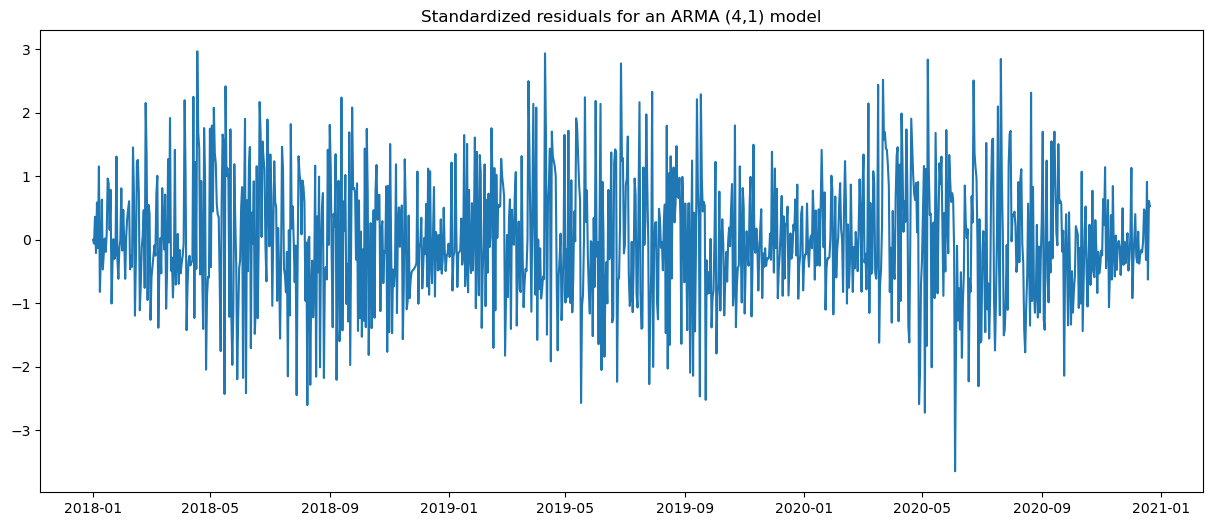

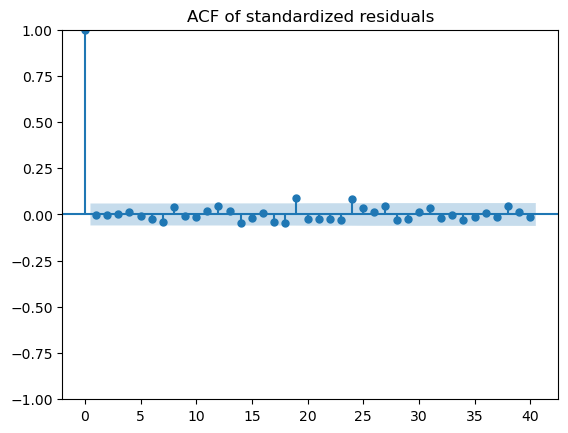

In [251]:
# residuals of model ARMA after training
ARMA_residuals = ARMA_results.resid

# standardized residuals
ARMA_std_residuals = ARMA_residuals / np.std(ARMA_residuals)

#plot
plt.figure(figsize=(15,6))
plt.plot(ARMA_std_residuals)
plt.title('Standardized residuals for an ARMA (4,1) model')


plot_acf(ARMA_std_residuals, lags=40)
plt.title('ACF of standardized residuals')


In [252]:
#Ljung-box to determine the confidence of the non-hypothesis
import statsmodels.api as sm

df= sm.stats.acorr_ljungbox(ARMA_residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])

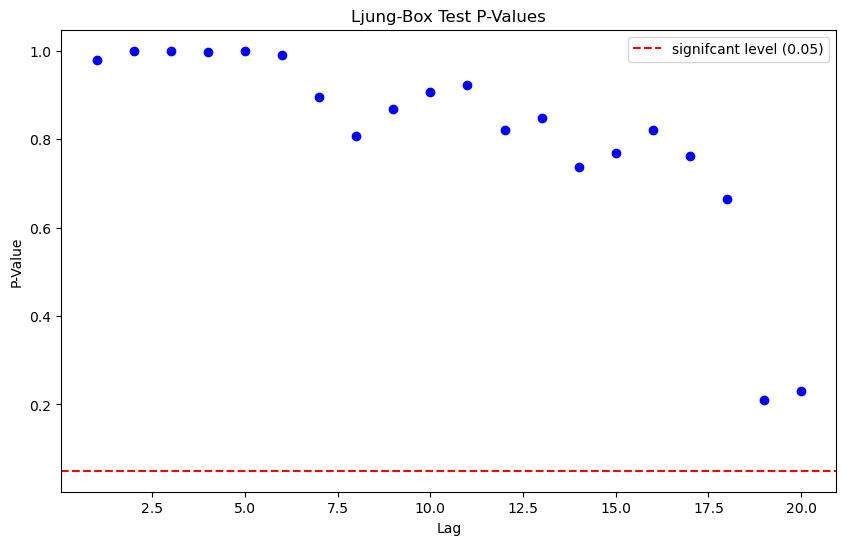

In [253]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), df1,marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

There is no autocorrelation up to 20 lags

MODEL GARCH


In [269]:
!pip install arch
from arch import arch_model
import arch
from scipy.stats import chi2 

In [270]:
# train the Garch model
model = arch_model(stationnarized, vol='Garch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 678188.2383376971
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3063.6064719985825
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2999.4027883956787
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3004.894301405063
Iteration:      5,   Func. Count:     32,   Neg. LLF: 2997.0602489385374
Iteration:      6,   Func. Count:     38,   Neg. LLF: 558343.4887209493
Iteration:      7,   Func. Count:     45,   Neg. LLF: 3001.640486797422
Iteration:      8,   Func. Count:     52,   Neg. LLF: 2995.648053816973
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2995.646330705533
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2995.6463274234948
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2995.646327425865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2995.6463274234948
            Iterations: 11
            Function evaluations: 66
            Gradient evaluation

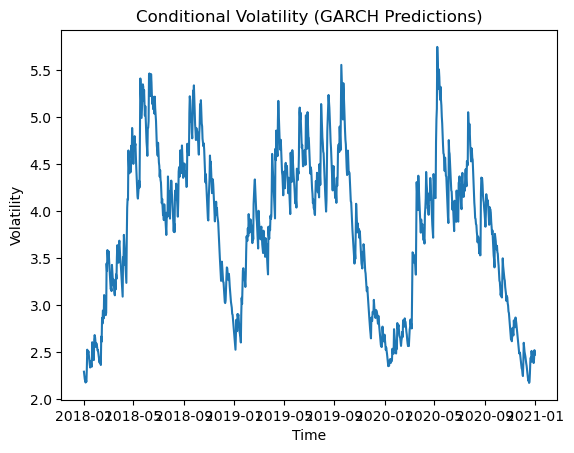

In [271]:
# Garch prediction
forecasts = results.conditional_volatility
plt.plot(forecasts)
plt.title('Conditional Volatility (GARCH Predictions)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()

In [272]:
# GARCH summary
model = arch_model(stationnarized, vol='Garch', p=1, q=1)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 678188.2383376971
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3063.6064719985825
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2999.4027883956787
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3004.894301405063
Iteration:      5,   Func. Count:     32,   Neg. LLF: 2997.0602489385374
Iteration:      6,   Func. Count:     38,   Neg. LLF: 558343.4887209493
Iteration:      7,   Func. Count:     45,   Neg. LLF: 3001.640486797422
Iteration:      8,   Func. Count:     52,   Neg. LLF: 2995.648053816973
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2995.646330705533
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2995.6463274234948
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2995.646327425865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2995.6463274234948
            Iterations: 11
            Function evaluations: 66
            Gradient evaluation

In [273]:
estimated_value = results.params['alpha[1]']
standard_error = results.conditional_volatility

In [274]:
wald_statistic = (estimated_value / standard_error) ** 2
degrees_of_freedom = 1 
p_value = 1 - chi2.cdf(wald_statistic, degrees_of_freedom)
print("Wald Test p-value:", p_value)

Wald Test p-value: [0.98220731 0.98188867 0.9815758  ... 0.98318198 0.98382334 0.98351062]


In [275]:
model = arch.arch_model(stationnarized, vol='Garch', p=0, o=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5148.451180241597
Iteration:      2,   Func. Count:     13,   Neg. LLF: 31450621370.569946
Iteration:      3,   Func. Count:     22,   Neg. LLF: 686228.0580469846
Iteration:      4,   Func. Count:     28,   Neg. LLF: 3013.9141599865625
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3179.310243512631
Iteration:      6,   Func. Count:     40,   Neg. LLF: 3012.063587504144
Iteration:      7,   Func. Count:     46,   Neg. LLF: 3005.865212089387
Iteration:      8,   Func. Count:     51,   Neg. LLF: 3005.931730228933
Iteration:      9,   Func. Count:     57,   Neg. LLF: 3005.8475422685924
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3005.824128149702
Iteration:     11,   Func. Count:     68,   Neg. LLF: 3005.824105337684
Iteration:     12,   Func. Count:     72,   Neg. LLF: 3005.8241053367037
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3005.824105337684
            Iterations: 

In [276]:
residuals = results.resid

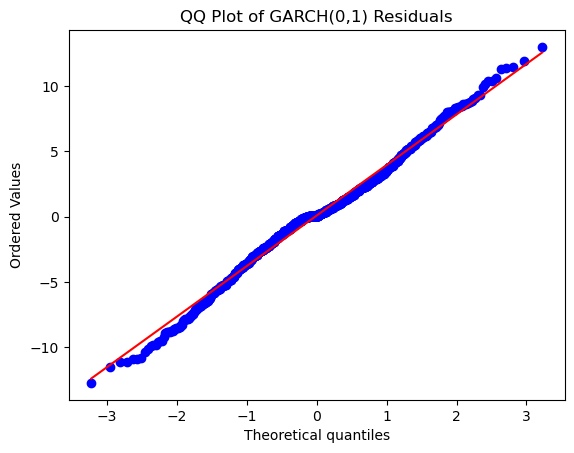

In [277]:
# plot the Q-Q plot of GARCH(0,1)'s residuals 
from scipy import stats
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('QQ Plot of GARCH(0,1) Residuals')
plt.show()